In [1]:
import json
import pandas as pd
from tensorflow.keras.models import load_model
from src.plotting import plot_roc, get_nn_roc_vals
from tensorflow_addons.metrics import F1Score

In [2]:
roc_df_p = r'E:/Faculta/Anul2/Disertatie/cognitive-aether/datasets/v2/validate/0_rayleigh_fading_ofdm.csv'
nn_cfg_path = r'E:/Faculta/Anul2/Disertatie/cognitive-aether/configs/train.json'
model_path = r'E:/Faculta\Anul2/Disertatie/cognitive-aether/models_weights/energy_detect_v1/energy_detect_v1_epoch10_vloss0.43.hdf5'

In [3]:
with open(nn_cfg_path) as json_file:
    model_cfg = json.load(json_file)

In [4]:
model = load_model(model_path,
                   custom_objects={"F1Score": F1Score})

In [6]:
roc_df = pd.read_csv(roc_df_p)

E:\Faculta\Anul2\Disertatie\cognitive-aether\src\plotting.py:48: UserWarning: image is size 4 on the last axis, but multichannel is False.  If this is a color image, please set multichannel to True for proper noise estimation.
  sigma = estimate_sigma(slide_window_data, average_sigmas=True)


(797,) (797, 1)
226 226


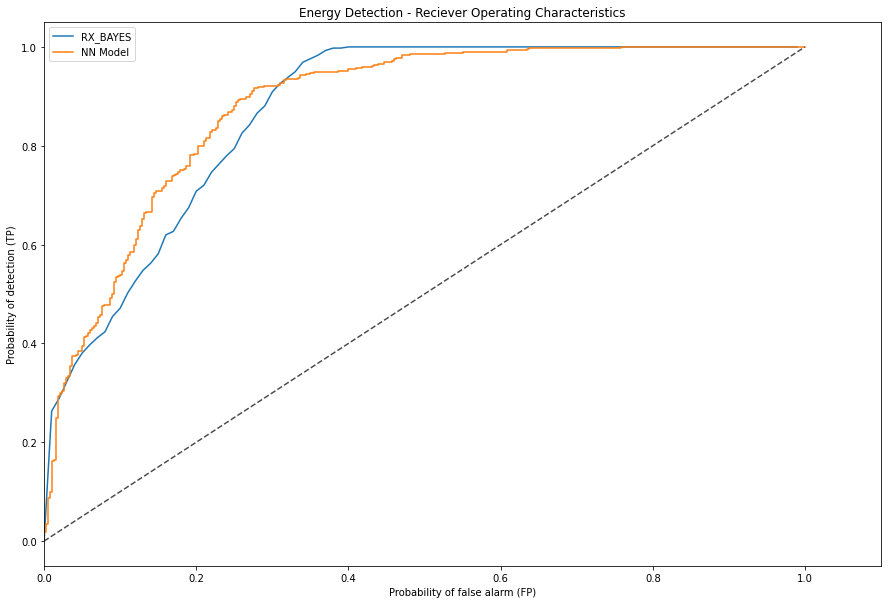

In [7]:
plot_roc(roc_test_df=roc_df[:(len(roc_df)//100)], sensing_window=3,
         compare_signals=['RX_BAYES'], json_cfg=model_cfg, nn_model=model)